<a href="https://colab.research.google.com/github/Rifat-87/Deep-Learning-Assignment-1/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialization

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df  = pd.read_csv('https://raw.githubusercontent.com/Rifat-87/Deep-Learning-Assignment-1/main/Diabetes.csv')

# ***Information Dataset***

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0,1.0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000,1.000000


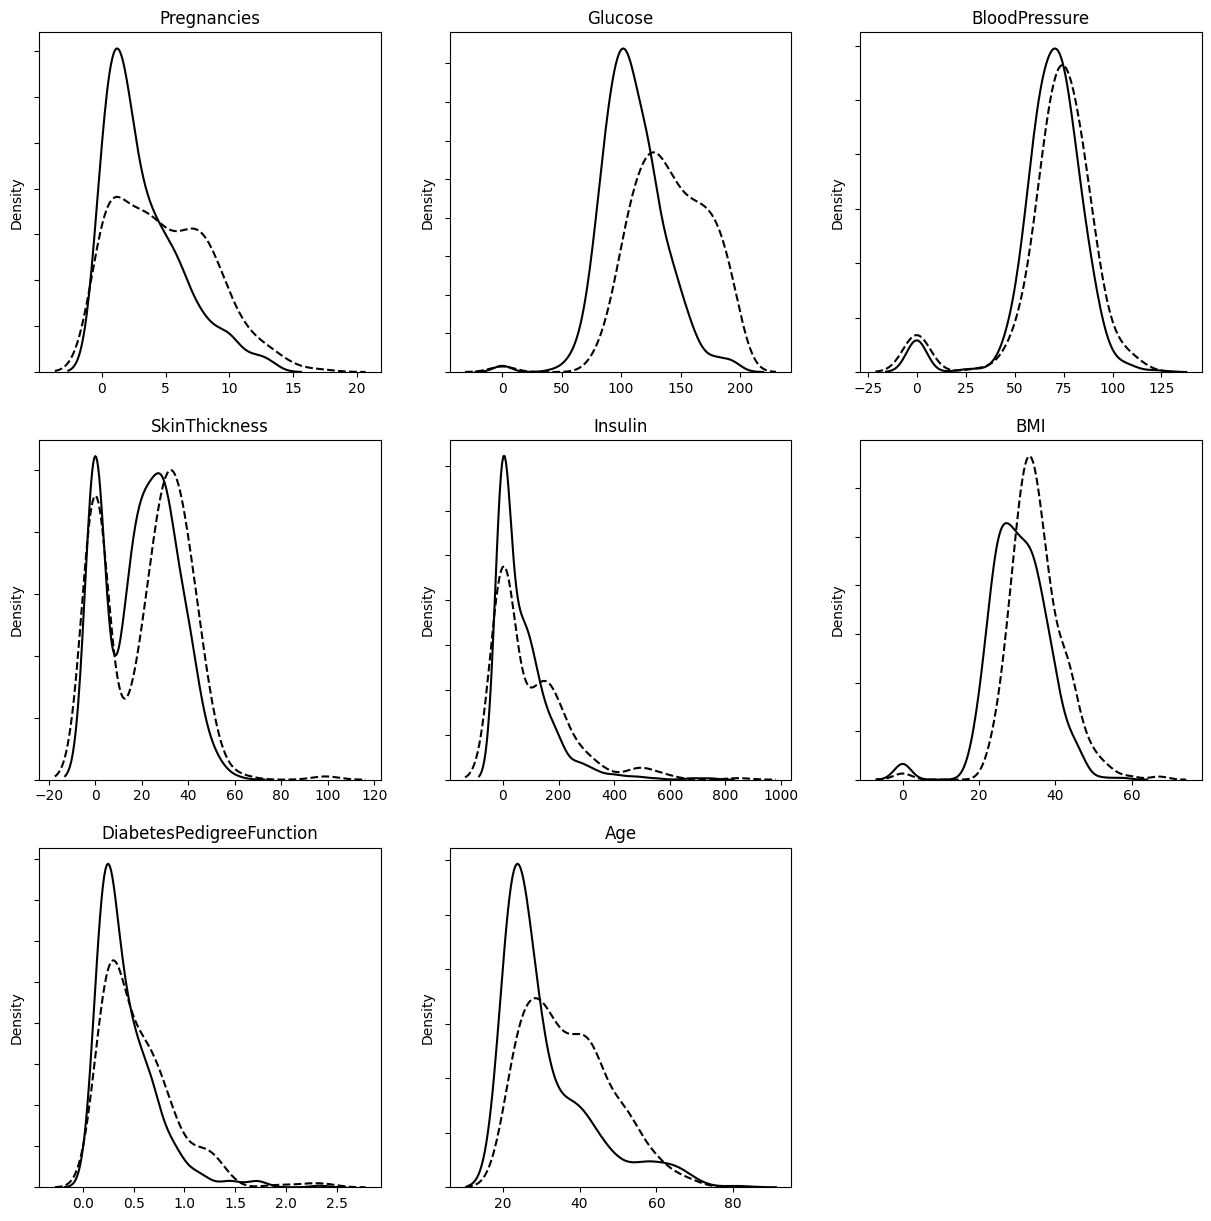

In [ ]:
import seaborn as sns
plt.subplots(3,3,figsize=(15,15))

for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False,
    kde_kws={'linestyle':'-',
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False,
    kde_kws={'linestyle':'--',
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)

# ***Splitting Data***

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# ***Model***

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#mlp = MLPClassifier(max_iter=500, activation='relu')
mlp = MLPClassifier(hidden_layer_sizes=(50,100),max_iter=100, activation='relu',
                    solver='adam', alpha=10, batch_size=min(20, 100), learning_rate='adaptive',
                    learning_rate_init= 0.0060, power_t= 0.01, validation_fraction=0.01,)

mlp


MLPClassifier(alpha=10, batch_size=20, hidden_layer_sizes=(50, 100),
              learning_rate='adaptive', learning_rate_init=0.006, max_iter=100,
              power_t=0.01, validation_fraction=0.01)

In [ ]:
mlp.fit(X_train,y_train)

MLPClassifier(alpha=10, batch_size=20, hidden_layer_sizes=(50, 100),
              learning_rate='adaptive', learning_rate_init=0.006, max_iter=100,
              power_t=0.01, validation_fraction=0.01)

In [ ]:
pred = mlp.predict(X_test)
pred

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

# ***Outcome***

8/8 [==============================] - 0s 3ms/step


Text(0, 0.5, 'True Positive Rate')

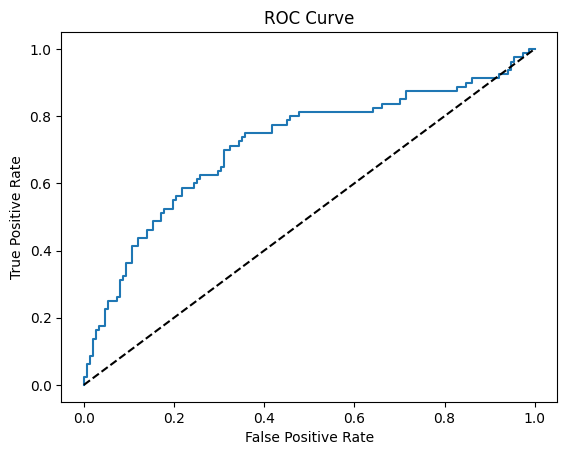

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,pred)


array([[120,  35],
       [ 22,  54]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       155
         1.0       0.61      0.71      0.65        76

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.75      0.76       231



In [ ]:
y_test_pred = mlp.predict(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.75
Recall: 0.71


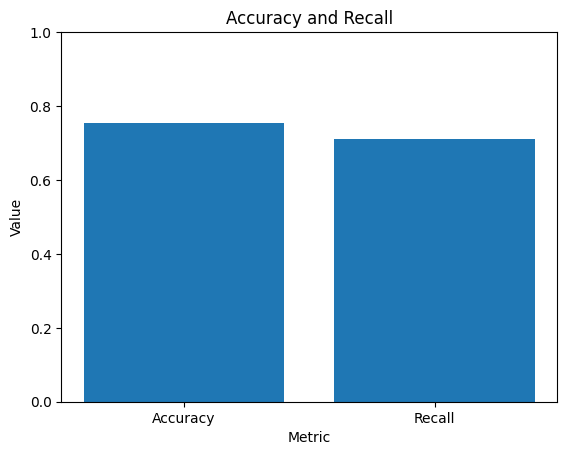

In [ ]:
labels = ['Accuracy', 'Recall']
values = [accuracy, recall]

plt.bar(labels, values)
plt.ylim(0, 1)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy and Recall')
plt.show()